In [1]:
# Step 1: Import necessary libraries
import numpy as np                     # For numerical operations and arrays
import random                          # To select random images for testing
import matplotlib.pyplot as plt         # For displaying images and graphs
from tensorflow.keras.models import Sequential      # To create a linear model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten  # CNN layers

In [2]:
# Step 2: Load Dataset (input images and labels)
# We assume the data is stored in CSV files
X_train = np.loadtxt('input.csv', delimiter=',')        # Load training image data
Y_train = np.loadtxt('labels.csv', delimiter=',')       # Load training labels

X_test = np.loadtxt('input_test.csv', delimiter=',')    # Load testing image data
Y_test = np.loadtxt('labels_test.csv', delimiter=',')   # Load testing labels

In [3]:
# Step 3: Reshape the image data into 4D format (required for CNN) (number_of_images, height, width, channels)
# 100x100 is image size, 3 is for RGB color channels
X_train = X_train.reshape(len(X_train), 100, 100, 3)
X_test = X_test.reshape(len(X_test), 100, 100, 3)


In [4]:
# Labels reshape
#when loading from a CSV file, labels are stored as a 1D array
#CNN models (especially during training) often expect the label array to be 2D —
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)


In [5]:
# Step 4: Normalize image pixels (0–1 range)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Step 5: Check shapes
print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


In [7]:
# # Show one random image
# idx = random.randint(0, len(X_train)-1)
# plt.imshow(X_train[idx])
# plt.title("Example Training Image")
# plt.show()

In [8]:
# Step 6: Build CNN Model
model = Sequential()

In [9]:
# Step 5: Build the CNN model

# 1st Convolution + Pooling layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))  # 32 filters, 3x3 size
model.add(MaxPooling2D((2,2)))  # Reduce image size by taking max values

# 2nd Convolution + Pooling layer
model.add(Conv2D(32, (3,3), activation='relu'))  # Extract more features
model.add(MaxPooling2D((2,2)))  # Further reduce size

# Flatten layer – converts 2D data to 1D for fully connected layers
model.add(Flatten())

# Fully connected (dense) layers
model.add(Dense(64, activation='relu'))      # Hidden layer with 64 neurons
model.add(Dense(1, activation='sigmoid'))    # Output layer (1 neuron → binary output)


C:\Users\mohit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 6: Compile the model
# 'binary_crossentropy' → because output is 0 or 1
# 'adam' → optimizer for faster and better learning
# 'accuracy' → to measure how well the model performs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# Step 7: Train the model
# epochs = number of times model sees the data
# batch_size = number of samples processed before updating weights
# validation_data = test data to check performance after each epoch
model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_data=(X_test, Y_test))
#The model will train on 64 images at a time, then update its weights.- batch size

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 391ms/step - accuracy: 0.5332 - loss: 0.7420 - val_accuracy: 0.5400 - val_loss: 0.6847
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 366ms/step - accuracy: 0.5619 - loss: 0.6672 - val_accuracy: 0.6550 - val_loss: 0.6238
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 295ms/step - accuracy: 0.7225 - loss: 0.5775 - val_accuracy: 0.6550 - val_loss: 0.6306
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 310ms/step - accuracy: 0.7569 - loss: 0.4997 - val_accuracy: 0.6825 - val_loss: 0.6181
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 311ms/step - accuracy: 0.7884 - loss: 0.4247 - val_accuracy: 0.6875 - val_loss: 0.6020


In [12]:
# Step 8: Evaluate the model performance on test data
loss, acc = model.evaluate(X_test, Y_test)
print("Test Accuracy:", acc)    # Shows accuracy on test images
print("Test Loss:", loss)       # Shows error value


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7024 - loss: 0.6041
Test Accuracy: 0.6875
Test Loss: 0.6020395159721375


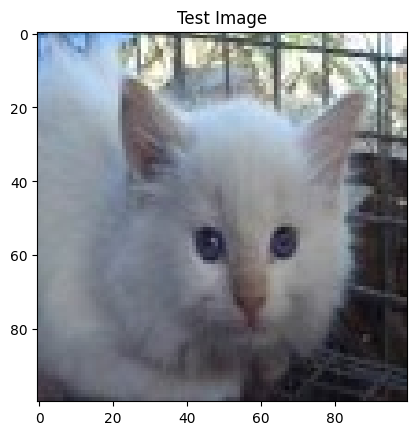

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Our model says it is a: Cat


In [17]:
# Step 9: Make a prediction on a random test image
idx2 = random.randint(0, len(Y_test)-1)   # Select a random image
plt.imshow(X_test[idx2])                  # Display the test image
plt.title("Test Image")
plt.show()

# Predict the class of that single image
y_pred = model.predict(X_test[idx2].reshape(1,100,100,3))
y_pred = y_pred > 0.5   # If value > 0.5 → Cat, else Dog

# Print predicted label
if y_pred == 0:
    pred = "Dog"
else:
    pred = "Cat"

print("Our model says it is a:", pred)